## Background

(From https://www.kaggle.com/headsortails/us-election-2020-presidential-debates.)

The US 2020 election saw the incumbent Republican president Donald Trump facing off against his Democrat challenger Joe Biden. Both candidates agreed to debate their political stances in the lead-up to the vote on November 3rd.

The 1st debate took place on September 29th at Case Western Reserve University in Cleveland, Ohio. It was moderated by Fox News anchor Chris Wallace. 

After Donald Trump tested positive for Covid-19 after his first debate and subsequently recovered, the 2nd presidential debate was initially converted into a virtual event. However, Trump declined to participate in a virtual debate and the event was transformed into a (socially distanced) town hall with Joe Biden alone. This event was moderated by George Stephanopoulos on the ABC network and took place on October 15th. Donald Trump then decided to hold a town hall of his own, which took place at the same day and time as the Biden town hall and was aired on NBC. This event was moderated by Savannah Guthrie.

The actual 2nd, and final, presidential debate between Biden and Trump took place on October 22nd at Belmont University, Nashville, Tennessee and was moderated by NBC News' Kristen Welker. This debate implemented stricter conditions on the candidates' speaking times to limit the frequent interruptions that had characterised the 1st debate.

The goal of this homework assignment is to investigate the transcripts of those events.

The data files are available via https://github.com/umsi-data-science/data/tree/main/us_election_2020.  Note that each file is available in two formats: CSV and TXT. You can work from either format -- the content of the corresponding CSV and TXT files is the same.

You can either use the correct URLs to the Raw version of the data files like we've done with other data files in the course so far, you can clone the repo if you're comfortable with ```git```, or you can click on each file and then view the "Raw" format and download the resulting file.  You do not need the us_election_2020_vice_presidential_debate files as we are only concerned with the presidential debates and town halls for this assignment.

Note that *you* will need to make decisions about how you
proceed with the analysis.  For example, you will need to 
decide whether you include or omit stopwords, whether you stem or lemmatize words before analysis, and how you handle weird situations.

You will need to decide when to exclude speech from the moderators and when to include it (note that in most cases, the assignment asks about the candidates, which means Trump and Biden and not the moderators).

Please fill in your uniqname in the next code cell:

In [1]:
MY_UNIQNAME = "aarjun"

Answer each of the questions below.  You are encouraged to use as many code and markdown cells as you need for each question.

We **strongly** suggest running all cells from top to bottom before you submit your notebook.

## 1. How many words did each candidate (Trump & Biden) use in each debate?

In [536]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

first_presidential_debate = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/\
archive-2/us_election_2020_1st_presidential_debate.csv")

second_presidential_debate = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/\
archive-2/us_election_2020_2nd_presidential_debate.csv")

trump_df_1 = first_presidential_debate[first_presidential_debate['speaker'].str.contains('Trump')]
biden_df_1 = first_presidential_debate[first_presidential_debate['speaker'].str.contains('Biden')]

trump_df_2 = second_presidential_debate[second_presidential_debate['speaker'].str.contains('Trump')]
biden_df_2 = second_presidential_debate[second_presidential_debate['speaker'].str.contains('Biden')]

trump_text_df_1 = trump_df_1.drop(['speaker', 'minute'], axis=1)
biden_text_df_1 = biden_df_1.drop(['speaker', 'minute'], axis=1)

trump_text_df_2 = trump_df_2.drop(['speaker', 'minute'], axis=1)
biden_text_df_2 = biden_df_2.drop(['speaker', 'minute'], axis=1)


### Removing contractions from the text and tokenization of the text

In [537]:
import numpy as np
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

trump_text_df_1 ['no_contract'] = trump_text_df_1 ['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
trump_text_df_1 ['text'] = [' '.join(map(str, l)) for l in trump_text_df_1 ['no_contract']]
trump_text_df_2 ['no_contract'] = trump_text_df_2 ['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
trump_text_df_2 ['text'] = [' '.join(map(str, l)) for l in trump_text_df_2 ['no_contract']]

biden_text_df_1['no_contract'] = biden_text_df_1['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
biden_text_df_1['text'] = [' '.join(map(str, l)) for l in biden_text_df_1['no_contract']]
biden_text_df_2['no_contract'] = biden_text_df_2['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
biden_text_df_2['text'] = [' '.join(map(str, l)) for l in biden_text_df_2['no_contract']]

trump_text_df_1['tokenized'] = trump_text_df_1['text'].apply(word_tokenize)
trump_text_df_1['tokenized'] = trump_text_df_1['tokenized'].apply(lambda x: [word.lower() for word in x])
trump_text_df_2['tokenized'] = trump_text_df_2['text'].apply(word_tokenize)
trump_text_df_2['tokenized'] = trump_text_df_2['tokenized'].apply(lambda x: [word.lower() for word in x])

biden_text_df_1['tokenized'] = biden_text_df_1['text'].apply(word_tokenize)
biden_text_df_1['tokenized'] = biden_text_df_1['tokenized'].apply(lambda x: [word.lower() for word in x])
biden_text_df_2['tokenized'] = biden_text_df_2['text'].apply(word_tokenize)
biden_text_df_2['tokenized'] = biden_text_df_2['tokenized'].apply(lambda x: [word.lower() for word in x])

### Remove punctuations from the text

In [538]:
punc = string.punctuation
trump_text_df_1['tokenized'] = trump_text_df_1['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in punc])

biden_text_df_1['tokenized'] = biden_text_df_1['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in punc])

trump_text_df_2['tokenized'] = trump_text_df_2['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in punc])

biden_text_df_2['tokenized'] = biden_text_df_2['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in punc])

### Remove stopwords from the text

In [539]:
stop_words = set(stopwords.words('english'))
trump_text_df_1['tokenized']  = trump_text_df_1['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in stop_words])
biden_text_df_1['tokenized']  = biden_text_df_1['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in stop_words])

trump_text_df_2['tokenized']  = trump_text_df_2['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in stop_words])
biden_text_df_2['tokenized']  = biden_text_df_2['tokenized'].\
                                    apply(lambda x: [word for word in x if word not in stop_words])

### POS tagging the text

In [540]:
trump_text_df_1['pos_tags'] = trump_text_df_1['tokenized'].apply(nltk.tag.pos_tag)

biden_text_df_1['pos_tags'] = biden_text_df_1['tokenized'].apply(nltk.tag.pos_tag)

trump_text_df_2['pos_tags'] = trump_text_df_2['tokenized'].apply(nltk.tag.pos_tag)

biden_text_df_2['pos_tags'] = biden_text_df_2['tokenized'].apply(nltk.tag.pos_tag)

### Lemmatization of the text

In [541]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
trump_text_df_1['wordnet_pos'] = trump_text_df_1['pos_tags'].\
                                    apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

biden_text_df_1['wordnet_pos'] = biden_text_df_1['pos_tags'].\
                                    apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

trump_text_df_2['wordnet_pos'] = trump_text_df_2['pos_tags'].\
                                    apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

biden_text_df_2['wordnet_pos'] = biden_text_df_2['pos_tags'].\
                                    apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

In [542]:
wnl = WordNetLemmatizer()
trump_text_df_1['lemmatized'] = trump_text_df_1['wordnet_pos'].\
apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

biden_text_df_1['lemmatized'] = biden_text_df_1['wordnet_pos'].\
apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

trump_text_df_2['lemmatized'] = trump_text_df_2['wordnet_pos'].\
apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

biden_text_df_2['lemmatized'] = biden_text_df_2['wordnet_pos'].\
apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


unique_word_trump_1 = []
unique_word_biden_1 = []

unique_word_trump_2 = []
unique_word_biden_2 = []
for word in trump_text_df_1['tokenized']:
    for item in word:
#         if item not in unique_word_trump_1:
            unique_word_trump_1.append(item)

for word in biden_text_df_1['tokenized']:
  
    for item in word:
#         if item not in unique_word_biden_1 :
            unique_word_biden_1.append(item)

for word in trump_text_df_2['tokenized']:
  
    for item in word:
#         if item not in unique_word_trump_2 :
            unique_word_trump_2.append(item)

for word in biden_text_df_2['tokenized']:
  
    for item in word:
#         if item not in unique_word_biden_2 :
            unique_word_biden_2.append(item)


print(f"Number of words spoken by Trump in first presidential debate is {len(unique_word_trump_1)}")
print(f"Number of words spoken by Biden in first presidential debate is {len(unique_word_biden_1)}")
      
print(f"Number of words spoken by Trump in second presidential debate is {len(unique_word_trump_2)}")
print(f"Number of words spoken by Biden in second presidential debate is {len(unique_word_biden_2)}")



Number of words spoken by Trump in first presidential debate is 3318
Number of words spoken by Biden in first presidential debate is 2964
Number of words spoken by Trump in second presidential debate is 3483
Number of words spoken by Biden in second presidential debate is 3310


The number of words spoken by the candidates in the first and second presidential elections were calculated after removing the stop words. 

## 2. How many turns speaking did each candidate (Trump & Biden) take during each of the debates?

A "turn" is an uninterrupted period of speech.  For example, consider the following exchange:

>Chris: Big data is really interesting.

>Colleague: Actually, it's a bit boring.

>Chris: Really? Why would you say that?

>Colleague: Your choice of tools is really limited.

>Colleague: I mean, you're basically stuck with Spark, right?

>Chris: Yeah, but Spark provides most of the functionality you need to do really cool data science work.

In it, Chris had 3 turns, while his colleague had 2.

You answer should include a dataframe that looks like (with the real values instead of $__$:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Debate</th>
      <th>Second Debate</th>
    </tr>
    <tr>
      <th>Candidate</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Trump</th>
      <td>__</td>
      <td>__</td>
    </tr>
    <tr>
      <th>Biden</th>
      <td>__</td>
      <td>__</td>
    </tr>
  </tbody>
</table>
</div>

In [543]:

count = np.zeros(2,dtype=int)
for i in range(len(first_presidential_debate.speaker)):
    if first_presidential_debate.iloc[i]["speaker"] == 'President Donald J. Trump':
        if (i != len(first_presidential_debate.speaker)-1):
            if (first_presidential_debate.iloc[i]["speaker"] != first_presidential_debate.iloc[i+1]["speaker"]):
                count[0] = count[0] +1
        if first_presidential_debate.iloc[i]["speaker"] != first_presidential_debate.iloc[i-1]["speaker"]:
            count[0] = count[0] +1
    if first_presidential_debate.iloc[i]["speaker"] == 'Vice President Joe Biden':
        if (i != len(first_presidential_debate.speaker)-1):
            if (first_presidential_debate.iloc[i]["speaker"] != first_presidential_debate.iloc[i+1]["speaker"]):
                count[1] = count[1] +1
        if first_presidential_debate.iloc[i]["speaker"] != first_presidential_debate.iloc[i-1]["speaker"]:
            count[1] = count[1] +1

count = np.ceil(count/2)
count

array([305., 240.])

In [544]:
second_presidential_debate

,speaker,minute,text
0,Kristen Welker,00:18,"Good evening, everyone. Good evening. Thank yo..."
1,Donald Trump,07:37,How are you doing? How are you?
2,Kristen Welker,07:58,And I do want to say a very good evening to bo...
3,Kristen Welker,08:27,The goal is for you to hear each other and for...
4,Kristen Welker,09:03,… during this next stage of the coronavirus cr...
...,...,...,...
507,Kristen Welker,25:49,"All right. Vice President Biden, same question..."
508,Joe Biden,25:57,"I will say, I’m an American President. I repre..."
509,Joe Biden,26:19,"We can grow this economy, we can deal with the..."
510,Kristen Welker,26:53,"All right, I want to thank you both for a very..."


In [545]:
count = np.zeros(2,dtype=int)
for i in range(len(second_presidential_debate.speaker)):
    if second_presidential_debate.iloc[i]["speaker"] == 'Donald Trump':
        if (i != len(second_presidential_debate.speaker)-1):
            if (second_presidential_debate.iloc[i]["speaker"] != second_presidential_debate.iloc[i+1]["speaker"]):
                count[0] = count[0] +1
        if second_presidential_debate.iloc[i]["speaker"] != second_presidential_debate.iloc[i-1]["speaker"]:
            count[0] = count[0] +1
    if second_presidential_debate.iloc[i]["speaker"] == 'Joe Biden':
        if (i != len(second_presidential_debate.speaker)-1):
            if (second_presidential_debate.iloc[i]["speaker"] != second_presidential_debate.iloc[i+1]["speaker"]):
                count[1] = count[1] +1
        if second_presidential_debate.iloc[i]["speaker"] != second_presidential_debate.iloc[i-1]["speaker"]:
            count[1] = count[1] +1

count = np.ceil(count/2)
count

array([169., 113.])

In [546]:
data= ([{'First Debate': 305, 'Second Debate': 169}, 
                  {'First Debate' : 240, 'Second Debate' : 113}])

df = pd.DataFrame(data, index=['Trump', 'Biden' ])

df.index.name = 'Candidate'

df

,First Debate,Second Debate
Candidate,,
Trump,305,169
Biden,240,113


Insert your answer here.

## 3. How many different nouns did each candidate (Trump & Biden) use in each of the debates?  

Present your results using a visualization (hint: a simple bar chart, with one bar per candidate per debate would be a good choice; you should decide whether you want to somehow stack or group the bars in your bar chart, or just leave them all side by side). You do not need to report **which** nouns were used.  Provide a written interpretation of your visualization.

In [547]:
trump_text_df_1['Text'] = [' '.join(map(str, l)) for l in trump_text_df_1['lemmatized']]
biden_text_df_1['Text'] = [' '.join(map(str, l)) for l in biden_text_df_1['lemmatized']]
trump_text_df_2['Text'] = [' '.join(map(str, l)) for l in trump_text_df_2['lemmatized']]
biden_text_df_2['Text'] = [' '.join(map(str, l)) for l in biden_text_df_2['lemmatized']]
text_DT = " ".join(txt for txt in trump_text_df_1.Text)
text_JB = " ".join(txt for txt in biden_text_df_1.Text)
text_DT_2 = " ".join(txt for txt in trump_text_df_2.Text)
text_JB_2 = " ".join(txt for txt in biden_text_df_2.Text)

In [548]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(text_DT)
doc2 = nlp(text_JB)

doc3 = nlp(text_DT_2)
doc4 = nlp(text_JB_2)

words_noun_t_1 = []
words_noun_b_1 = []
words_noun_t_2 = []
words_noun_b_2 = []

for i, sent in enumerate(doc1.sents):
    for token in sent:
        if token.pos_ == 'NOUN':
            if token.text.lower() not in words_noun_t_1:
                 words_noun_t_1.append(token.text.lower())

for i, sent in enumerate(doc2.sents):
    for token in sent:
        if token.pos_ == 'NOUN':
            if token.text.lower() not in words_noun_b_1:
                 words_noun_b_1.append(token.text.lower())
                    
                    
for i, sent in enumerate(doc3.sents):
    for token in sent:
        if token.pos_ == 'NOUN':
            if token.text.lower() not in words_noun_t_2:
                 words_noun_t_2.append(token.text.lower())

for i, sent in enumerate(doc4.sents):
    for token in sent:
        if token.pos_ == 'NOUN':
            if token.text.lower() not in words_noun_b_2:
                 words_noun_b_2.append(token.text.lower())
                    


In [549]:
data= ([{'First Debate': len(words_noun_t_1), 'Second Debate': len(words_noun_t_2)}, 
                  {'First Debate' : len(words_noun_b_1), 'Second Debate' : len(words_noun_b_2)}])

df = pd.DataFrame(data, index=['Trump', 'Biden' ])

df.index.name = 'Candidate'
print(f"The number of different nouns used by Trump and Biden in each debate are provided in the table below:\n")
df


The number of different nouns used by Trump and Biden in each debate are provided in the table below:



,First Debate,Second Debate
Candidate,,
Trump,394,415
Biden,439,496


Pos tagging and lemmatization of the words were done in the first question. 

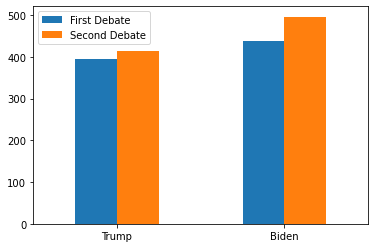

In [550]:
first_debate = [len(words_noun_t_1),len(words_noun_b_1)]
second_debate= [len(words_noun_t_2), len(words_noun_b_2)]
index = ['Trump', 'Biden']
df = pd.DataFrame({'First Debate': first_debate,
                    'Second Debate': second_debate}, index=index)
ax = df.plot.bar(rot=0)

As evident from the bar graph above, President Joe Biden has used more nouns than former president Donald Trump in both the presidential debate. 

## 4. Report the type-token ratio for each of the candidates (Trump & Biden), based on pooling the data from the two debates, and interpret the differences between the two candidates.

In text analysis, a 'type' is a unique word, whereas a 'token' is any word.  For example, the sentence

"One fish, two fish, red fish, blue fish"

contains 8 tokens, but 5 types (one, two, red, blue, fish).

Interestingly, the type-token ratio can be used to monitor changes in the use of vocabulary items in children with under-developed vocabulary and/or word finding difficulties and, for example, in adults who have suffered a stroke and who consequently exhibit word retrieval difficulties and naming difficulties. [Ref](https://www.sltinfo.com/type-token-ratio/)

In [551]:
T_text_1 = " ".join(txt for txt in trump_text_df_1.text)
T_text_2 = " ".join(txt for txt in trump_text_df_2.text)
T_text_final = T_text_1+T_text_2

B_text_1 = " ".join(txt for txt in biden_text_df_1.text)
B_text_2 = " ".join(txt for txt in biden_text_df_2.text)
B_text_final = B_text_1+B_text_2

import string

string.punctuation


table = str.maketrans(dict.fromkeys(string.punctuation))
T_text_final= T_text_final.translate(table)
B_text_final = B_text_final.translate(table)

In [552]:
import nltk as nlp2

tokens_DT = nlp2.word_tokenize(T_text_final)

tokens_JB = nlp2.word_tokenize(B_text_final)

types_DT=nlp2.Counter(tokens_DT)
types_JB=nlp2.Counter(tokens_JB)

In [553]:
TTR_DT= (len(types_DT)/len(tokens_DT))*100
TTR_JB= (len(types_JB)/len(tokens_JB))*100
print(f"The type-token ration of Trump (based on data from two debates) are {round(TTR_DT,2)}")
print(f"The type-token ration of Biden (based on data from two debates) are {round(TTR_JB,2)}")

The type-token ration of Trump (based on data from two debates) are 11.94
The type-token ration of Biden (based on data from two debates) are 14.27


1. The type-token ration of Joe Biden is more than that of Donald Trump. This means that Biden has selected the right vocabulary items to communicate his thoughts effectivelty to the public than Trump. 

2. The TTR are caluclated after removing the punctuations.


## 5. Compare the use of named entities by the candidates (Trump & Biden) in their town hall meetings.  What patterns, if any, do you see?  

spaCy supports the following Named Entity types:
PERSON, NORP (nationalities, religious and political groups), FAC (buildings, airports etc.), ORG (organizations), GPE (countries, cities etc.), LOC (mountain ranges, water bodies etc.), PRODUCT (products), EVENT (event names), WORK_OF_ART (books, song titles), LAW (legal document titles), LANGUAGE (named languages), DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL and CARDINAL.

You might want to use some visualization techniques to support your claims.

In [554]:
trump_townhall = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/\
archive-2/us_election_2020_trump_town_hall.csv")
biden_townhall = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/\
archive-2/us_election_2020_biden_town_hall.csv")

trump_th_1 = trump_townhall[trump_townhall['speaker'].str.contains('Trump')]
trump_th_1 = trump_th_1.drop(['speaker', 'minute'], axis=1)
trump_th_text = " ".join(txt for txt in trump_th_1.text)

biden_th_1 = biden_townhall[biden_townhall['speaker'].str.contains('Biden')]
biden_th_1 = biden_th_1.drop(['speaker', 'minute'], axis=1)
biden_th_text = " ".join(txt for txt in biden_th_1.text)

In [555]:
doc_DT = nlp(trump_th_text)
labels = [(X.label_) for X in doc_DT.ents]
nlp2.Counter(labels)

Counter({'GPE': 56,
         'CARDINAL': 45,
         'DATE': 42,
         'PERSON': 38,
         'TIME': 3,
         'ORDINAL': 4,
         'ORG': 26,
         'PERCENT': 13,
         'LOC': 4,
         'NORP': 11,
         'PRODUCT': 3,
         'LANGUAGE': 1,
         'MONEY': 5,
         'FAC': 1,
         'LAW': 3,
         'QUANTITY': 1})

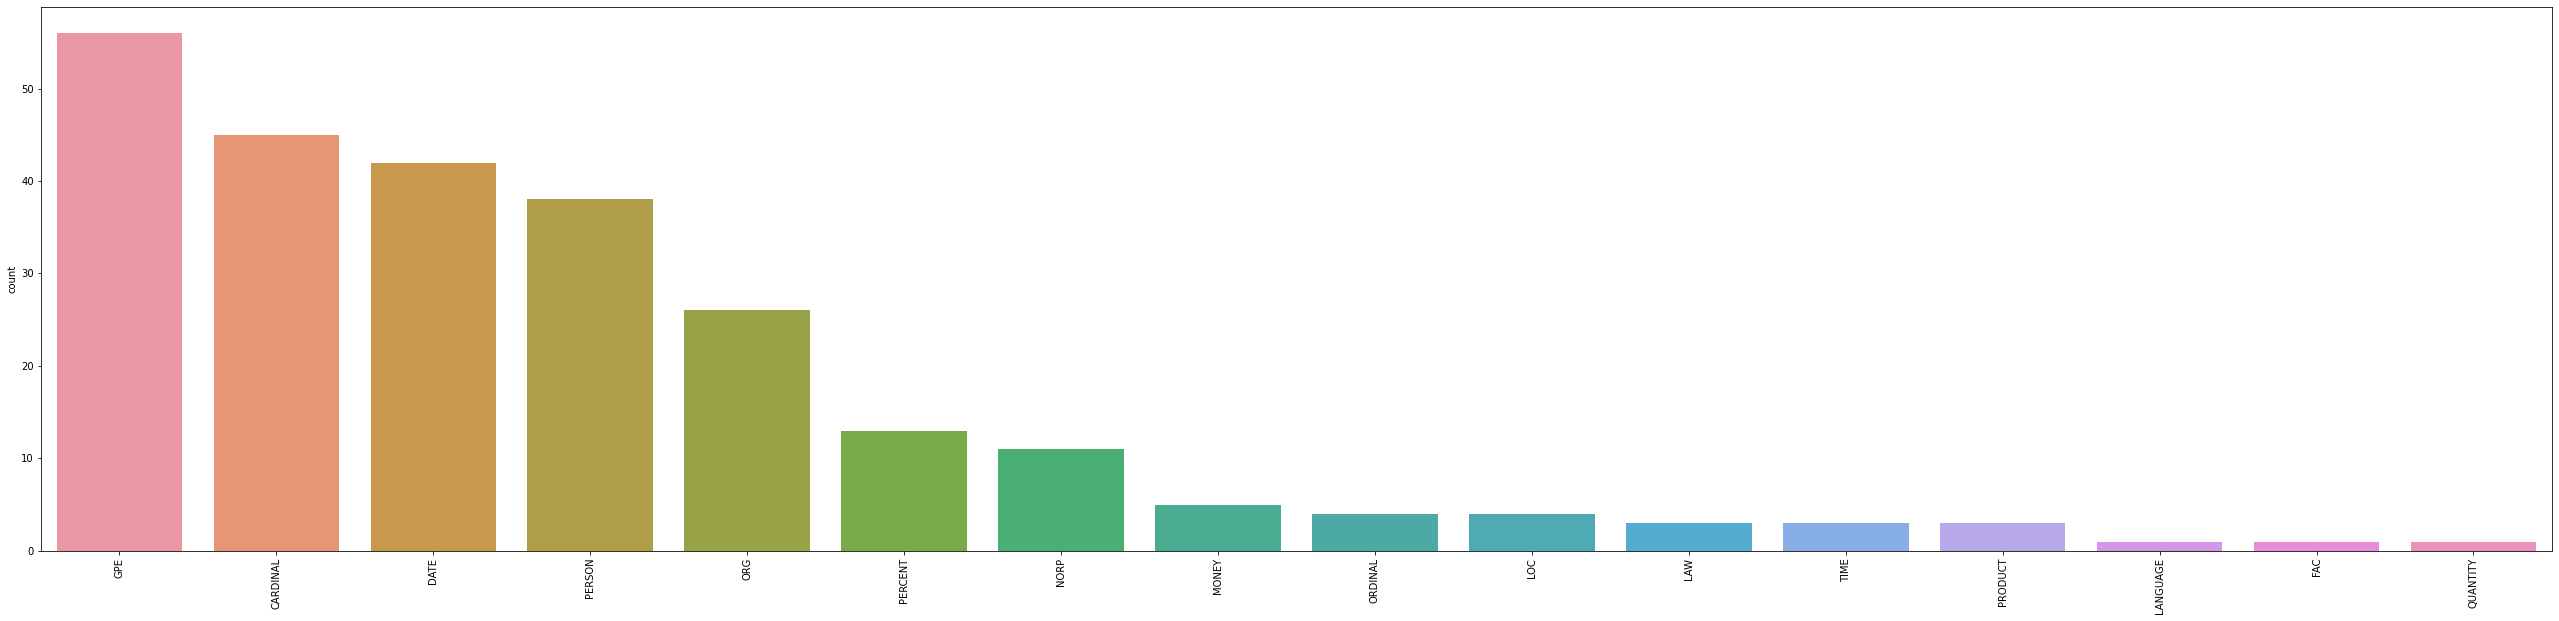

In [556]:
plt.figure(figsize=(45,10))
sns.countplot(x=labels, order=pd.Series(labels).value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [557]:
doc_JB = nlp(biden_th_text)
labels_JB = [(X.label_) for X in doc_JB.ents]
nlp2.Counter(labels_JB)

Counter({'ORDINAL': 21,
         'DATE': 43,
         'GPE': 41,
         'ORG': 50,
         'CARDINAL': 101,
         'PERSON': 41,
         'NORP': 32,
         'MONEY': 25,
         'PERCENT': 17,
         'PRODUCT': 2,
         'TIME': 4,
         'EVENT': 1,
         'WORK_OF_ART': 2,
         'LAW': 5,
         'LOC': 3,
         'QUANTITY': 1,
         'FAC': 1})

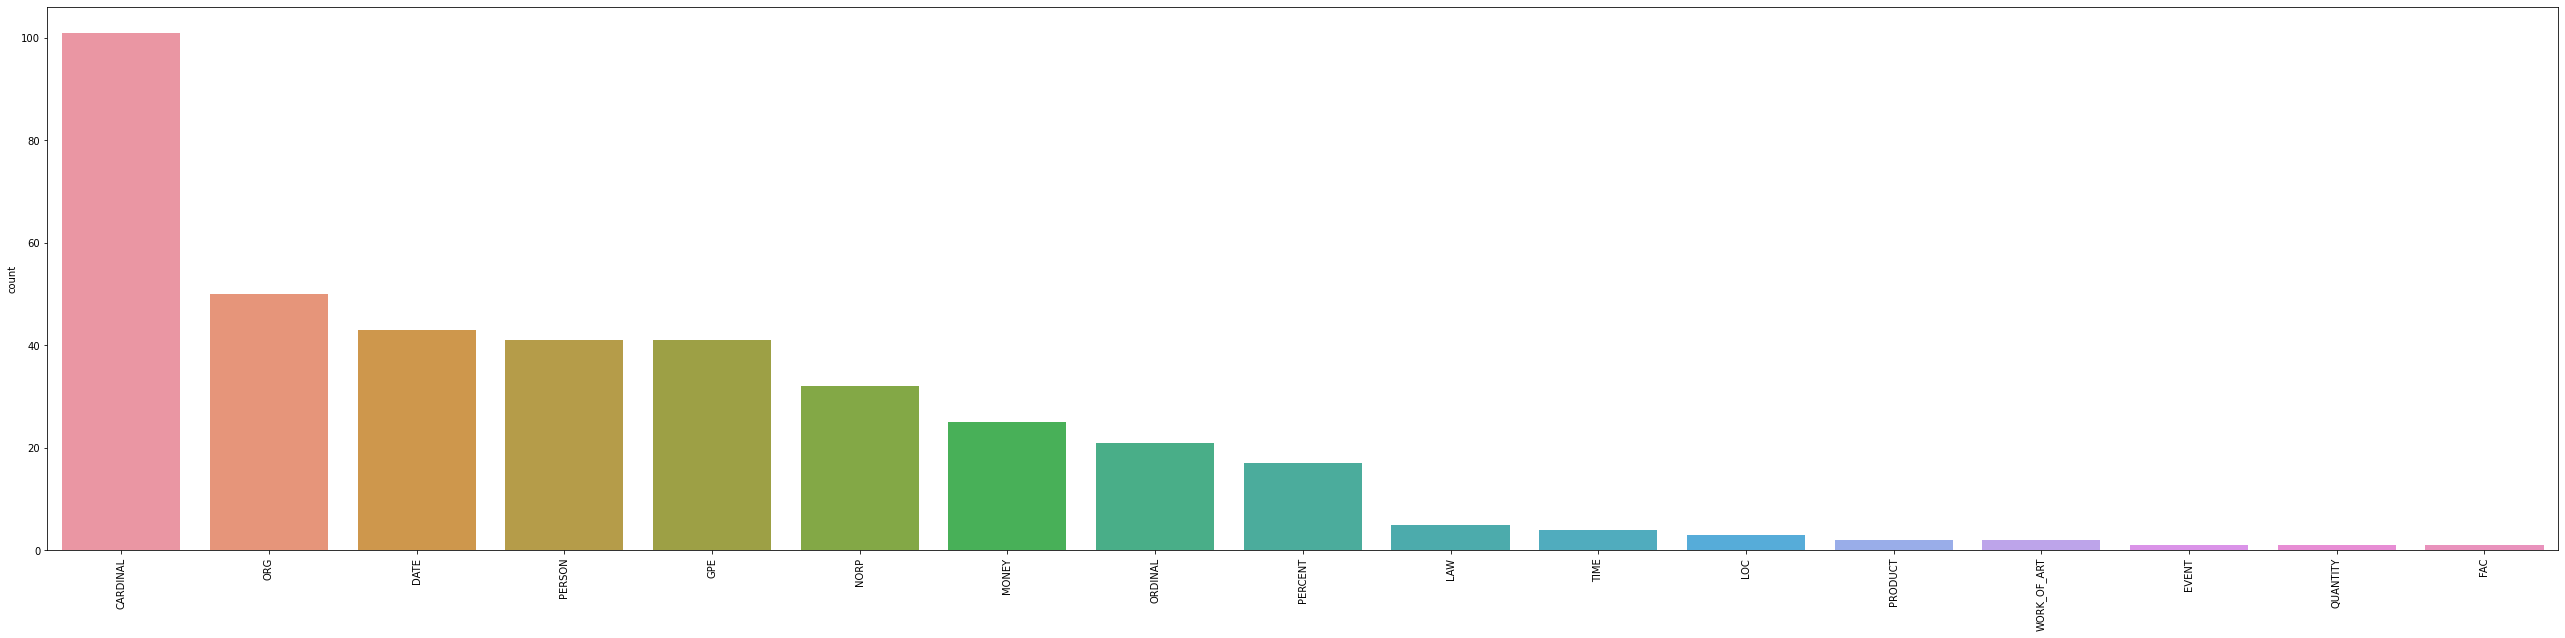

In [558]:
plt.figure(figsize=(45,10))
sns.countplot(x=labels_JB, order=pd.Series(labels_JB).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

1. The speech by Trump was centered around Geopolitical entity followed by Cardinal.
2. The speech by Biden was centered around Cardinal followed by ORG.
3. This means that Joe Biden's has used more facts and figures in his debate to justify his claim as opposed to his opponent Trump. 

## 6. Generate a word cloud for Trump's town hall (use only Trump's words) and one for Biden's town hall (again, use only Biden's words).  Compare and contrast the two word clouds.

Install a word cloud generating package like the one from https://github.com/amueller/word_cloud

In [559]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arjunanandapadmanabhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arjunanandapadmanabhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


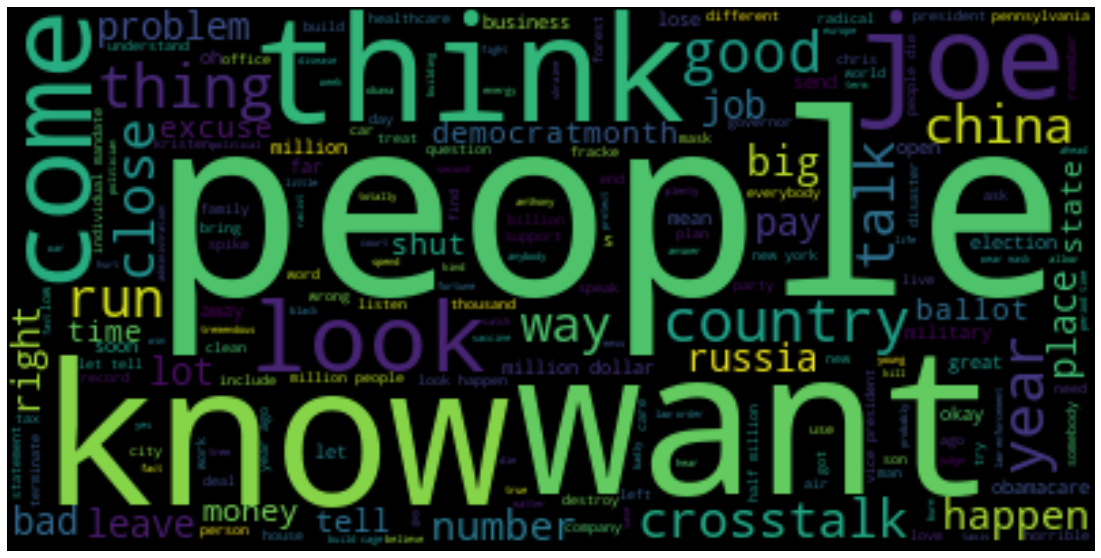

In [560]:
import re
sp = spacy.load('en_core_web_sm') 
spacy_st = list(nlp.Defaults.stop_words) # 362 stop words 
# NLTK packages
nltk.download('stopwords')
nltk.download('punkt')
nltk_st = stopwords.words('english') # 179 stop words

# some additional pucntuations observed in the dataset
punc = '’”“…'.join(string.punctuation)


# a general cleaning function
def clean(t, lower = False, http = False, punct = False,
          lem = False, stop_w = False, num = False,
          custom_st = ['a','the', 'and', 'there', 'that', 'this', 'am', 'on',
                       'if', 'it', 'to', 'at' 'a', 'of', 'in', 'out', 'were',
                       'was', 'do', 'did', "don't","didn't", 'be', 'are', 'is',
                       'being', "it's", 'have', 'had', 's', 'j', 't', 're',
                       'at', 'with', 'just', 'now', "can't", 'can', 'up',
                       'as', 'from', 'thing', 'by', 'so', 'here', 'will', 'for']):

    if lower:
        t = t.lower()
    
    if http:
        t = re.sub("https?:\/\/t.co\/[A-Za-z0-9]*", '', t)

    # lemmitizing
    if lem:
        # spacy replaces pronouns with '-PRON-' and we don't want that to happen
        # so we lemmatize everything exept words that are recognized as pronouns
        lemmatized = [word.lemma_ if word.lemma_ !='-PRON-' else word.text for word in sp(t)]
        t = ' '.join(lemmatized)

    # stop words
    if stop_w == 'nltk':
        t = [word for word in word_tokenize(t) if not word.lower() in nltk_st]
        t = ' '.join(t)

    elif stop_w == 'spacy':
        t = [word for word in word_tokenize(t) if not word.lower() in spacy_st]
        t = ' '.join(t)
        
    elif stop_w == 'custom':
        t = [word for word in word_tokenize(t) if not word.lower() in custom_st]
        t = ' '.join(t)

    # punctuation removal
    if punct:
        t = t.translate(str.maketrans('', '', punc))
    if num:
        t = re.sub("[0-9]","", t)
    # removing extra spaces and letters
    t = re.sub("\s+", ' ', t)
    t = re.sub("\b\w\b", '', t)
    return t


clean_text = clean(T_text_final, lower = True, http = False,
                                                         punct = True, lem = True, 
                                                         stop_w = 'spacy', num = True)

clean_text_2 = clean(B_text_final, lower = True, http = False,
                                                         punct = True, lem = True, 
                                                         stop_w = 'spacy', num = True)

clean_text_DT = clean_text.lower()
clean_text_JB = clean_text_2.lower()


wordcloud = WordCloud().generate(clean_text_DT)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [561]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

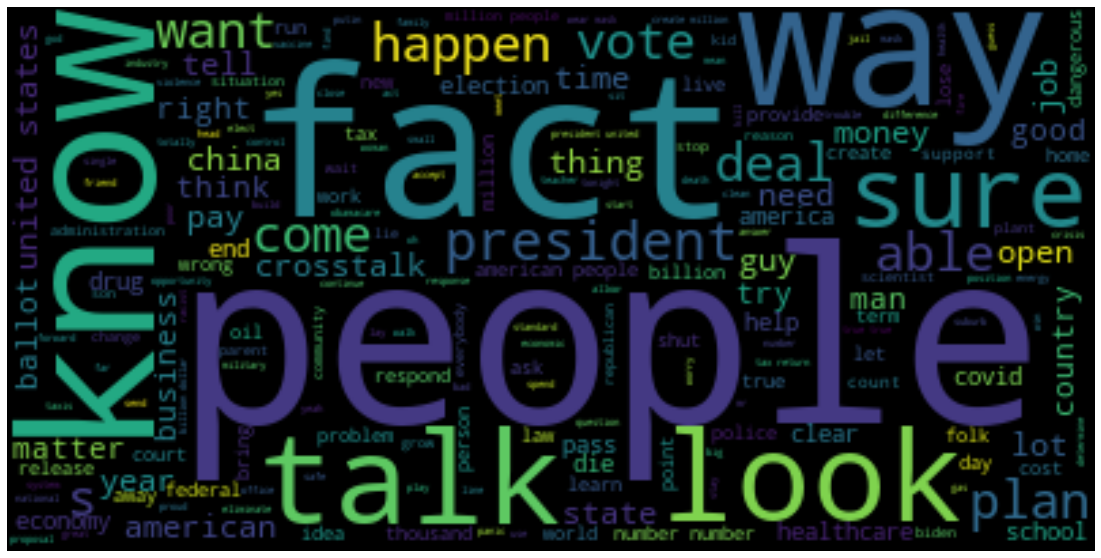

In [562]:

wordcloud = WordCloud().generate(clean_text_JB)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

1. Interesting fact about the wordcloud for both Trump and Biden is that "People" and "Know" are the most used words. They both have talked a lot about China. 
2. In Joe Biden's word cloud, we can see that the words like Fact, way, talk, school, healthcare, job, pay etc are more centered towards the policies, and economy of the United states. 
3. In Donald Trump's word cloud, we can see that the word's like think, bussiness, ballot, election, money, close, big, lose, bad are more centered towards the election. 


## 7. Sentiment analysis of Trump vs. Biden in second debate

Note that you will want to review the video on Sentiment Analysis with NLTK and spaCy from the pre-recorded lectures.

Perform a sentiment analysis that compares the sentiment of the two candidates (Trump & Biden) in the second debate.  

There are several ways to do this.  In its simplest form, you could determine the sentiment for each utterance, the perform some mathematical summary (sum, mean, etc.) A slightly more elegant solution would involve tracking how sentiment changes over the course of the debate for each of the candidates.  A further extension of your work might use the [pandas.DataFrame.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to calculate rolling averages, although using that function will probably require you to also learn about [time functions in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

No matter what approach you choose, you should be sure to use visualizations in your answer.  As always, provide an interpretation of your results, including any visualizations (i.e. don't just provide a visualization, explain what's interesting that you see in your visualizations).

In [563]:
# !pip install -U textblob
# !python -m textblob.download_corpor

In [564]:
from textblob import TextBlob, Word, Blobber

trump_df_2['polarity'] = trump_df_2.text.apply(lambda x: TextBlob(x).polarity)
trump_df_2['subjectivity'] = trump_df_2.text.apply(lambda x: TextBlob(x).subjectivity)
trump_df_2['sentiment'] = trump_df_2.polarity.apply(lambda x: 4 if x>0.6 else 3 if x>0.2 else 2 if x>-0.2 else 1 if x>-0.6  else 0)

# second df
biden_df_2['polarity'] = biden_df_2.text.apply(lambda x: TextBlob(x).polarity)
biden_df_2['subjectivity'] = biden_df_2.text.apply(lambda x: TextBlob(x).subjectivity)
biden_df_2['sentiment'] = biden_df_2.polarity.apply(lambda x: 4 if x>0.6 else 3 if x>0.2 else 2 if x>-0.2 else 1 if x>-0.6  else 0)

trump_df_2.reset_index(drop = True, inplace = True)
biden_df_2.reset_index(drop = True, inplace = True)

In [565]:
# pip install plotly==4.12.0

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import warnings
import os
%matplotlib inline

In [567]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [568]:
nlp = spacy.load('en_core_web_sm')

In [570]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

ValueError: [E090] Extension 'sentimenter' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [571]:
trump_df_2['rating'] = trump_df_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound']) 
biden_df_2['rating'] = biden_df_2['text'].apply(lambda x: nlp(x)._.sentimenter['compound'])

Text(0.5, 1.0, 'Number of Sentences used by Debaters with different Polarities')

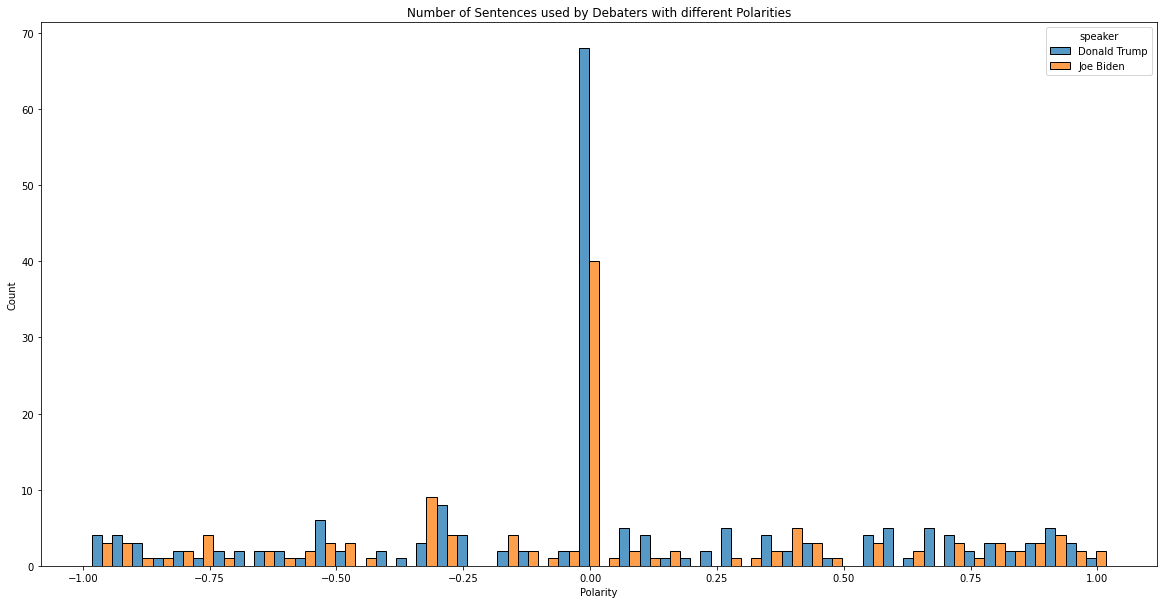

In [572]:
fig, ax = plt.subplots(figsize=(20,10))
g= sns.histplot(
    data=both, x= both.rating, hue=both.speaker, multiple='dodge',
     ax=ax, binwidth=0.04, color=['red', 'blue']
)
plt.xlabel('Polarity')
plt.title("Number of Sentences used by Debaters with different Polarities")


What we see here is that Trump has more sentences with more neutral statements, but we cannot conclude that he talks less subjectivly because he dominates around 40 percent of the conversations and therefore it is normal to see him have more neutral words. But interestingly, there are only few times when Biden wins over Trump by using twice as much sentences (-0.8, -0.4 and -0.2 on the left hand side of the graph and  0.4 and 0.5 on the right hand side of the graph).


# Please submit your notebook in .IPYNB and .HTML formats

We **strongly** suggest running all cells from top to bottom before you submit your notebook.